# Modelos GARCH

- Os modelos  ARCH(m) vistos anteriormente tem a característica de que, na prática, precisa-se de um valor de $m$ muito grande.
- Para resolver este problema, Bollerslev (1986) propôs uma generalizacão do modelo ARCH, chamada de GARCH (Generalized ARCH).
- O modelo é mais parcimonioso e têm um melhor desempenho do que os modelos ARCH.

**Definicão:** Um modelo GARCH(p,q) é definido por 
\begin{align*}
r_t &= \sigma_t \epsilon_t \\
\sigma_t^2 &= \omega + \displaystyle \sum_{i = 1}^p \alpha_i r_{t-i}^2 + \sum_{j = 1}^q \beta_j \sigma_{t-j}^2,
\end{align*} em que $\epsilon_t$ é _iid_ com média zero e variância 1, $\omega > 0$, $\alpha_i, \beta_j \geq 0$ e $\alpha_1 + \cdots + \alpha_p + \beta_1 + \cdots + \beta_q < 1$ (condicão sufiente de estacionariedade).

**Observacão:** Note que um GARCH(p,q) pode escrito na forma de um ARMA.

- Defina $\nu_t = r_t^2 - h_t$
- $r_t^2 = \omega + \displaystyle \sum_{i = 1}^k(\alpha_i + \beta_i)r_{t-i}^2 + \nu_t - \sum_{j = 1}^q \beta_j \nu_{t-j},$ em que $k = max(p,q).$

## Propriedades

- $\mathbb{E}(r_t) = 0$
- $\mathbb{V}(r_t) = \mathbb{E}(r_t^2) = \dfrac{\omega}{1 - \alpha_1 - \cdots - \alpha_p - \beta_1 - \cdots - \beta_q}$
- $\mathbb{C}ov(r_t, r_{t+k}) = 0, \quad \forall k$ 

> Na prática, utilizamos valoes de $p$ e $q$ baixos. Por exemplo: GARCH(1, 1), GARCH(1, 2), GARCH(2, 1), GARCH(2, 2). **Na maioria da aplicacões o GARCH(1, 1) é suficiente.**

## Identificaão:

- A identificacão segue o já aprendido no modelo ARCH (devemos verificar se a variância condicional precisa ser modelada).
- Identificar a ordem do modleo GARCH não é tão facil (embora pode-se seguir o mesmo procedimento utilizado para modelos ARMA devido à forma alternataiva de escrever o modelo GARCH). 
- A prática commúm é ajustar modelos GARCH de ordem baixa e utilizar algum criterio de informacão (AIC, BIC, AICc) para escolher, dentre os modelos que capturaram apropriadamente a dinânica dos dados, o melhor. Outra opcao pode ser através de validacão cruzada para séries temporais.

## Estimacão:

Pode ser feita por máxima verossimilhanca condicional. Se $\Theta = (\omega, \alpha_1, \cdots, \alpha_p, \beta_1, \cdots, \beta_q)$,
$$L(\Theta) = \displaystyle \prod_{i = p+1}^T f(r_i | \mathcal{F}_{i-1})$$

$$l(\Theta) = \displaystyle \sum_{i = p+1}^T \log(f(r_i | \mathcal{F}_{i-1})),$$ em que, para $k = 1, \cdots, q$, $\sigma_k^2 = \hat{\sigma}^2 = \mathbb{V}(r_k)$ ou a variância amostral.


No caso de normalidade, 

$$l(\Theta) \propto - \sum_{i = p+1}^T \log(\sigma_i^2) -  \sum_{i = p+1}^T \dfrac{r_i^2}{\sigma_i^2}$$

> **Como fariamos a implementacão computacional?**

In [1]:
# Simulando GARCH
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [2]:
set.seed(123)
serie = garch.sim(alpha = c(.005, 0.08), beta = 0.85, n = 1000)

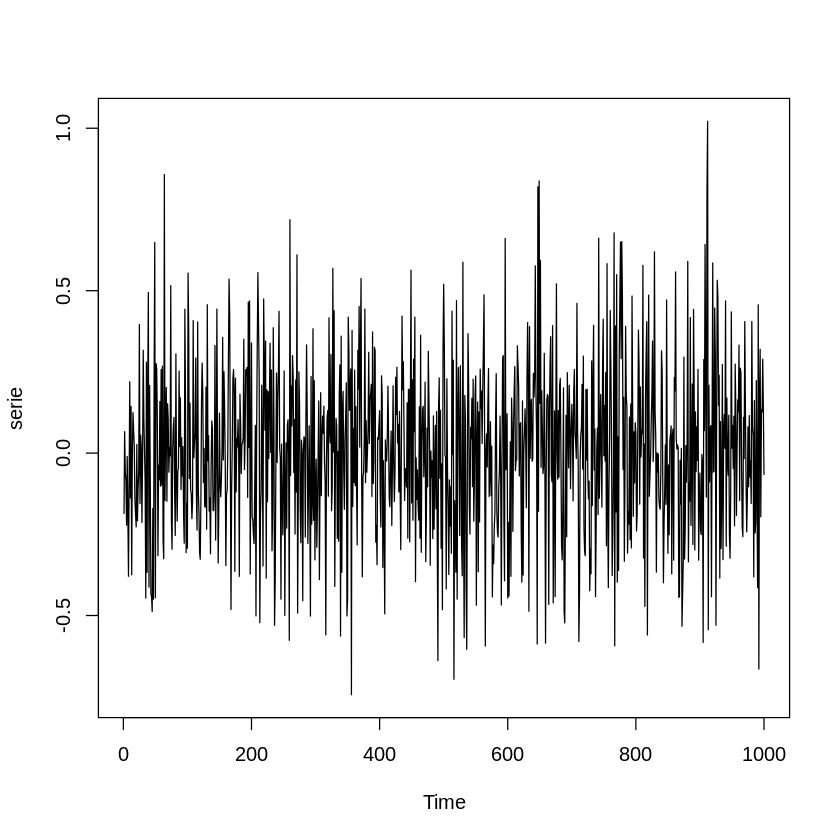

In [3]:
ts.plot(serie)

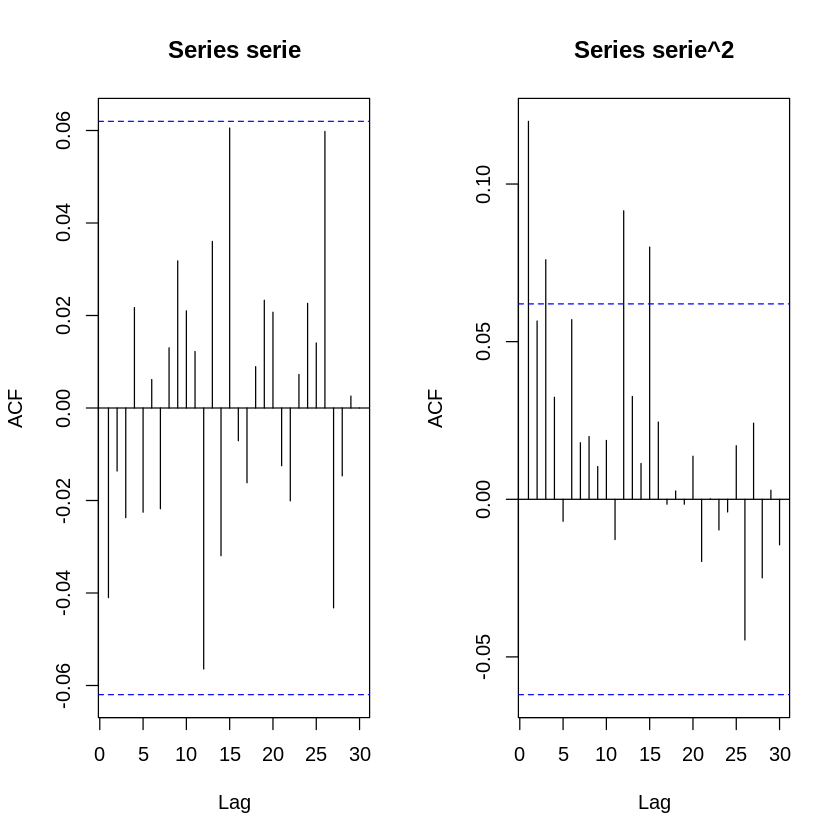

In [4]:
op = par(mfrow = c(1,2))
acf(serie)
acf(serie^2)
par(op)

In [5]:
ll_garch11 = function(r, params) {
  n = length(r)
  sigma2 = rep(0, n)
  ll = rep(0, n - 1)
  sigma2[1] = var(r)
  for (i in 2:n) {
    sigma2[i] = params[1] + params[2]*r[i-1]^2 + params[3]*sigma2[i-1]
    ll[i-1] = -log(sigma2[i]) - r[i]^2/sigma2[i]
  }
  log_veross = -sum(ll)  # Para minimizar o negativo da log-veross
}


In [6]:
par_ini = c(0.005, 0.1, 0.8)
optim(par_ini, ll_garch11, r = serie)

Streaming output truncated to the last 5000 lines.
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i]):
“NaNs produced”
Warning message in log(sigma2[i

$par
[1] 0.008743596 0.060068821 0.815243933

$value
[1] -1673.667

$counts
function gradient 
     130       NA 

$convergence
[1] 0

$message
NULL

## Previsão

Säo calculadas de forma similar ao modelo ARCH, _i.e,_ de forma recursiva. Por exemplo, para o caso GARCH(1, 1):

- $\hat{\sigma}_{T+1|T} = \hat{\omega} + \hat{\alpha} r_{T}^2 + \hat{\beta}\hat{\sigma}_T^2$
- $\hat{\sigma}_{T+k|T} = \hat{\omega} + \hat{\alpha} r_{T+k-1}^2 + \hat{\beta}\hat{\sigma}_{T+k-1}^2$

> É commum termos nas aplicacões práticas que $\alpha + \beta ≈ 1$. Se  $\alpha + \beta + 1$, temos o modelo IGARCH   \begin{align*}
r_t &= \sigma_t \epsilon_t \\
\sigma_t^2 &= \omega +  (1 - \beta) r_{t-1}^2 + \beta \sigma_{t-1}^2,
\end{align*} com $0 < \beta < 1$

In [7]:
install.packages("rugarch")
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [8]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0, 0), include.mean = FALSE),
                   variance.model = list(model = 'sGARCH', garchOrder = c(1, 1)),
                   distribution = 'norm')

In [9]:
summary(serie)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.743694 -0.166201  0.005876  0.006488  0.179236  1.021316 

In [10]:
serie_c = scale(serie, center = TRUE, scale = FALSE)

In [11]:
fit_01 <- ugarchfit(spec, serie_c, solver = 'hybrid')

In [12]:
fit_01


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.008876    0.007175   1.2370 0.216097
alpha1  0.059739    0.027512   2.1714 0.029903
beta1   0.813572    0.122902   6.6197 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.008876    0.007953   1.1161 0.264391
alpha1  0.059739    0.030821   1.9382 0.052596
beta1   0.813572    0.136827   5.9460 0.000000

LogLikelihood : -80.96887 

Information Criteria
------------------------------------
                    
Akaike       0.16794
Bayes        0.18266
Shibata      0.16792
Hannan-Quinn 0.17353

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
          

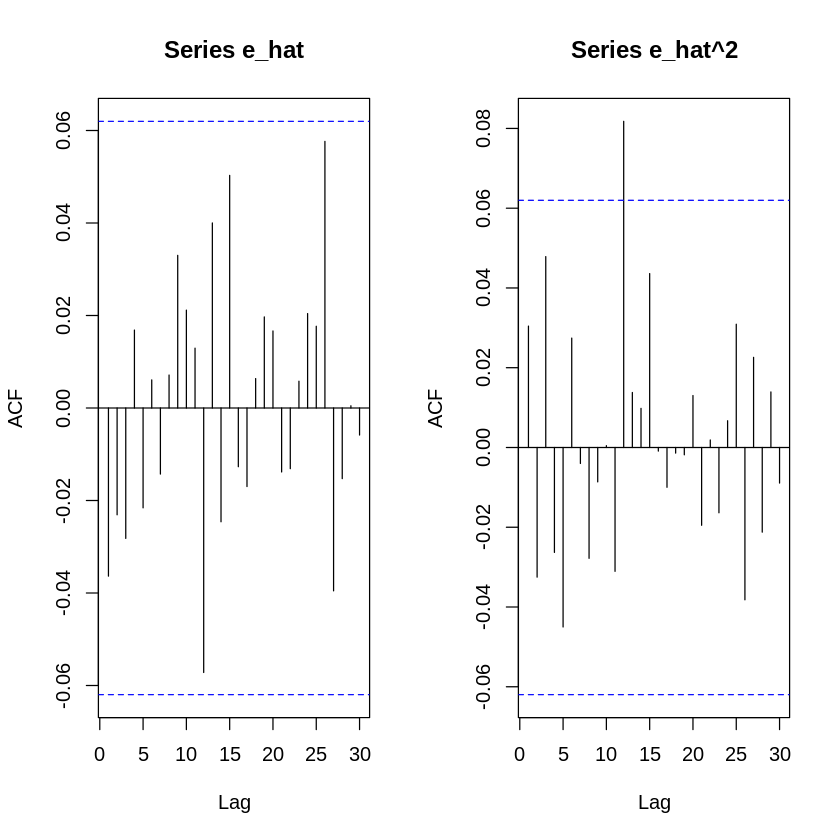

In [13]:
e_hat = fit_01@fit$residuals/fit_01@fit$sigma
op = par(mfrow = c(1,2))
acf(e_hat)
acf(e_hat^2)
par(op)

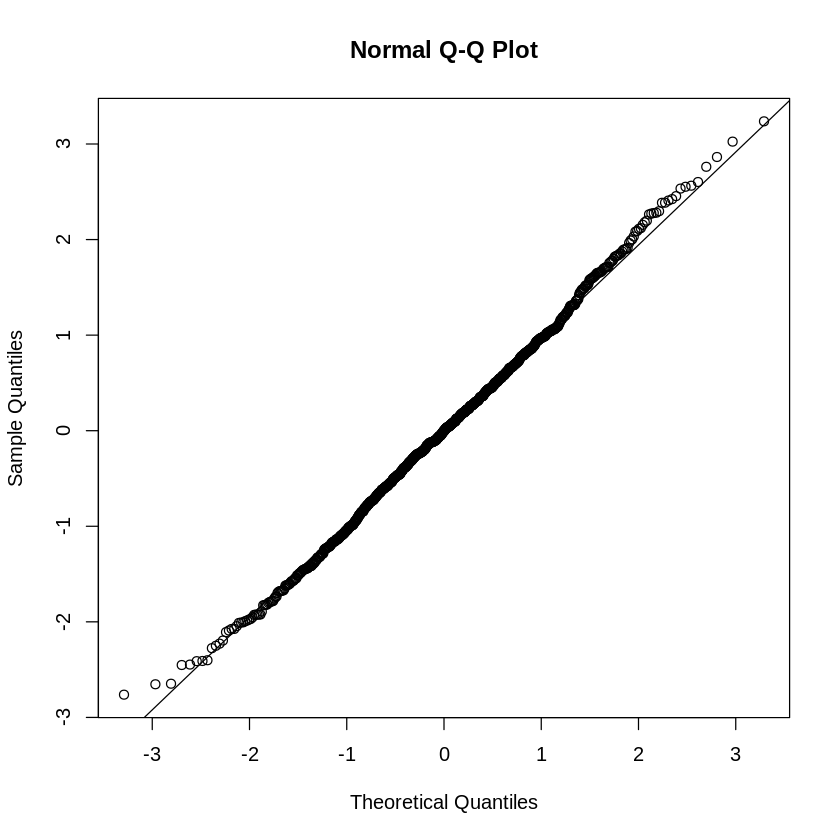

In [14]:
qqnorm(e_hat)
qqline(e_hat)

In [15]:
ugarchforecast(fit_01, n.ahead = 5)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 5
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1972-09-27]:
    Series  Sigma
T+1      0 0.2562
T+2      0 0.2573
T+3      0 0.2582
T+4      0 0.2591
T+5      0 0.2598



**O que fazer se quisermos ajustar um modelo IGARCH?**

In [17]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0, 0), include.mean = FALSE),
                   variance.model = list(model = 'sGARCH', garchOrder = c(1, 1)),
                   distribution = 'norm')
fit_02 <- ugarchfit(spec, serie_c, solver = 'hybrid')
fit_02


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.008876    0.007175   1.2370 0.216097
alpha1  0.059739    0.027512   2.1714 0.029903
beta1   0.813572    0.122902   6.6197 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.008876    0.007953   1.1161 0.264391
alpha1  0.059739    0.030821   1.9382 0.052596
beta1   0.813572    0.136827   5.9460 0.000000

LogLikelihood : -80.96887 

Information Criteria
------------------------------------
                    
Akaike       0.16794
Bayes        0.18266
Shibata      0.16792
Hannan-Quinn 0.17353

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
          

## Extensões do Modelo GARCH

- Os modelos GARCH capturam algumas das características frequentemente observadas em séries financeiras. Contudo, outras característica observadas nas séries não são capturadas. Para uma leitura dos chamados _fatos estilizados_, ver o artigo do [Cont (2001)](https://www.tandfonline.com/doi/pdf/10.1080/713665670) [**leiam!**]

**Definicão: (EGARCH):** Um modelo EGARCH(1, 1) é dado por 

\begin{align*}
r_t &= \sigma_t \epsilon_t, \\
\log(\sigma_t^2) &= \omega + \alpha \epsilon_{t-1 + \gamma} + \gamma (|\epsilon_{t-1}| - \mathbb{E}(|\epsilon_{t-1}|)) + \beta \log(\sigma_{t-1}^2),
\end{align*} em que $\epsilon_t$ é _iid_ com média zero e variância 1.

A especificaão logaritmica faz com que a variância nunca seja negativa, o que, consequentemente, faz com que não exista restricão para os parâmetros. Note que se $\alpha = 0$, choques positivos tem o mesmo efeito do que choques negativos na volatilidade. Se $\alpha \neq 0$ o efeito de choques positivos e negativos na volatilidade é diferente (assimétrico). Se $\alpha < 0$, choques negativos aumentam a volatilidade mais do que choques positivos.

In [18]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0, 0), include.mean = FALSE),
                   variance.model = list(model = 'eGARCH', garchOrder = c(1, 1)),
                   distribution = 'norm')
fit_03 <- ugarchfit(spec, serie_c, solver = 'hybrid')
fit_03


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega  -0.390886    0.261918  -1.4924 0.135595
alpha1  0.028233    0.027463   1.0281 0.303921
beta1   0.853357    0.097924   8.7145 0.000000
gamma1  0.123392    0.049680   2.4837 0.013002

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega  -0.390886    0.238855  -1.6365 0.101735
alpha1  0.028233    0.026492   1.0657 0.286552
beta1   0.853357    0.089877   9.4947 0.000000
gamma1  0.123392    0.045835   2.6921 0.007101

LogLikelihood : -81.52144 

Information Criteria
------------------------------------
                    
Akaike       0.17104
Bayes        0.19067
Shibata      0.17101
Hannan-Quinn 0.17850

Wei